<a href="https://colab.research.google.com/github/SilviaBrenda/HelloWorld/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection and Features Checking

In [2]:
# loading the dataset
wine_data = pd.read_csv("/content/winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isna().sum().sum()

0

Data Analysis and Visualization

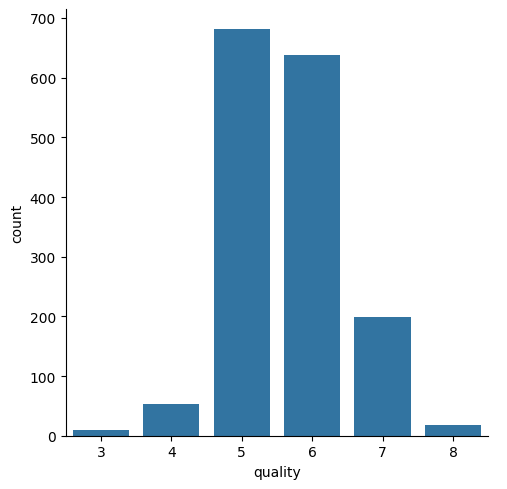

In [7]:
# number of values for each quality
sns.catplot(x = 'quality', data = wine_data, kind = 'count')

In [8]:
import random

In [9]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='volatile acidity'>

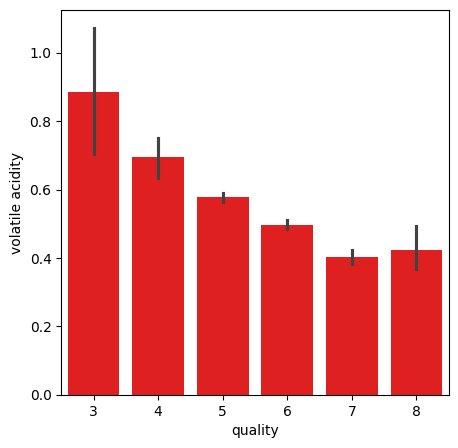

In [10]:
# volatile acidity vs quality
plt.figure(figsize =(5,5))
sns.barplot(y = 'volatile acidity', x = 'quality', data = wine_data, color = 'red')




<Axes: >

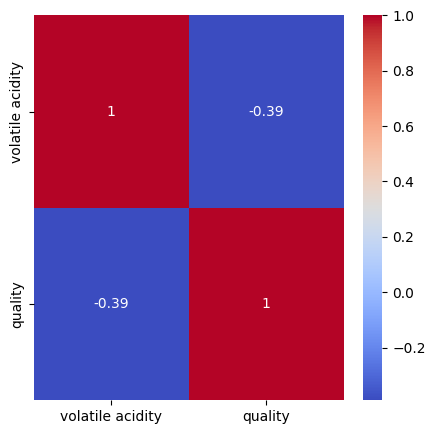

In [11]:
data0 = wine_data[['volatile acidity', 'quality']]
correlation = data0.corr()

plt.figure(figsize = (5,5))
sns.heatmap(correlation, annot = True, cmap ='coolwarm')

In [12]:
data1 = wine_data[['fixed acidity', 'quality']]
correlation = data1.corr()

<Axes: >

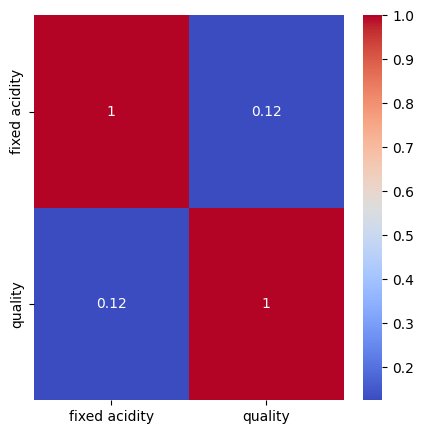

In [13]:
data1 = wine_data[['fixed acidity', 'quality']]
correlation = data1.corr()

plt.figure(figsize = (5,5))
sns.heatmap(correlation, annot = True, cmap ='coolwarm')

Text(0.5, 1.0, 'Fixed acidic vs Quality')

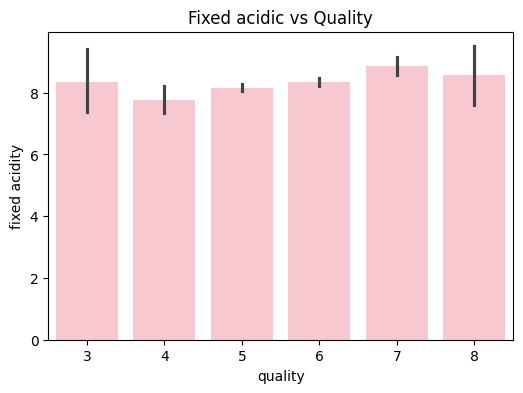

In [14]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data, color = 'pink')
plt.title("Fixed acidic vs Quality")

Text(0.5, 1.0, 'Citric acid vs Quality')

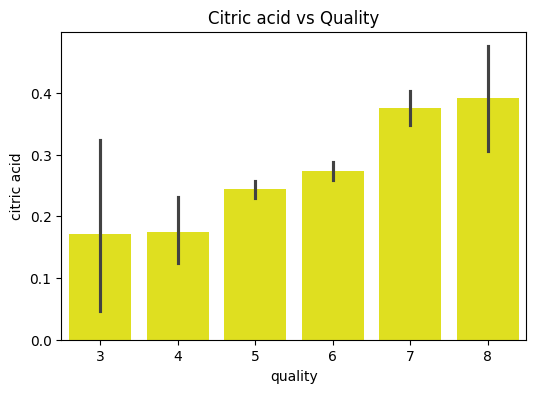

In [15]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data, color = 'yellow')
plt.title("Citric acid vs Quality")

<Axes: >

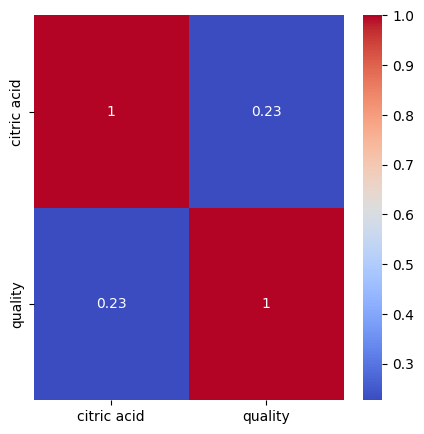

In [16]:
data2 = wine_data[['citric acid', 'quality']]
correlation = data2.corr()

plt.figure(figsize = (5,5))
sns.heatmap(correlation, annot = True, cmap ='coolwarm')

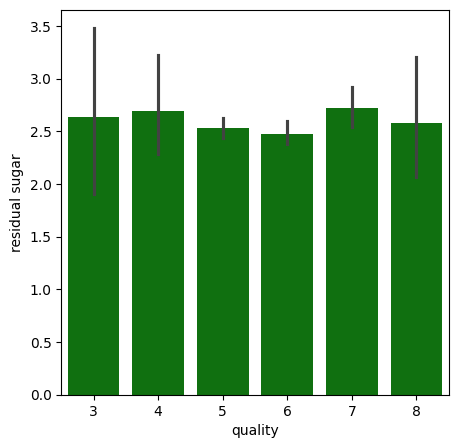

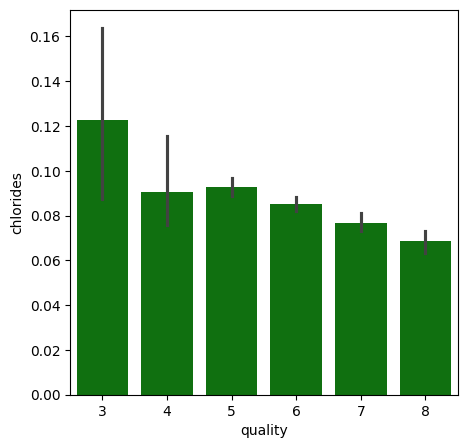

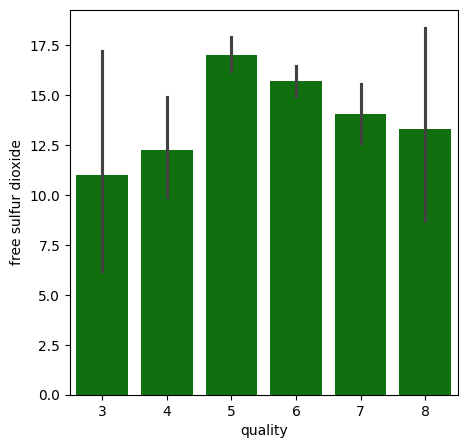

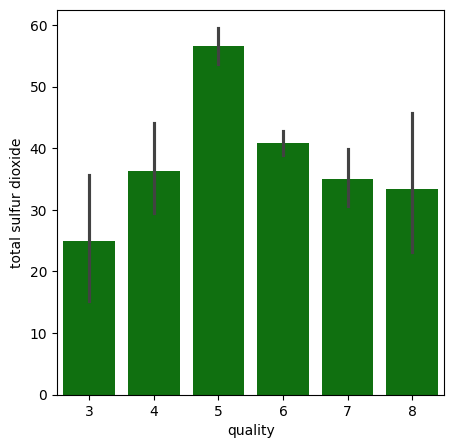

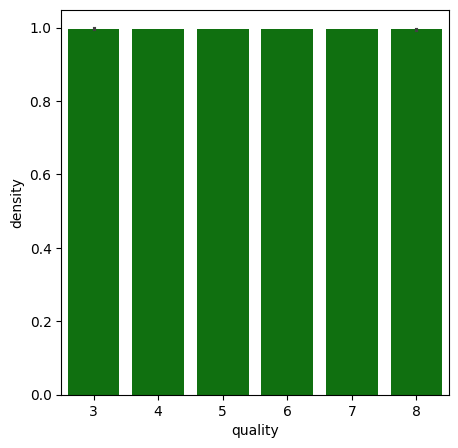

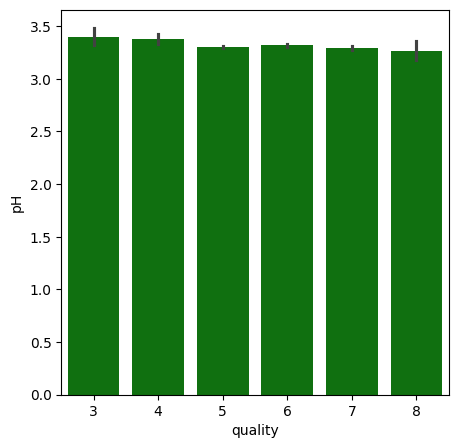

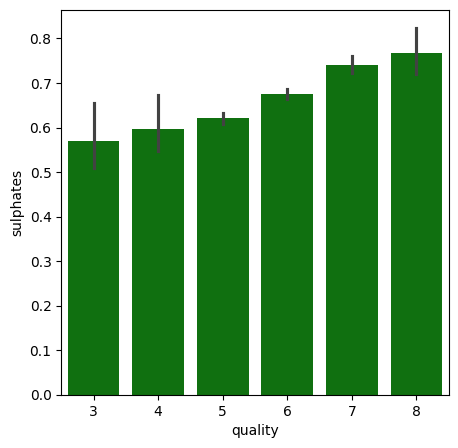

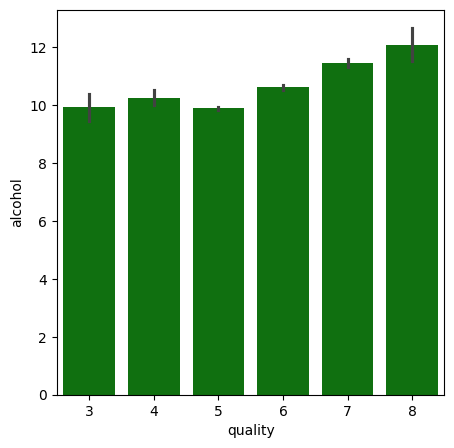

In [20]:
import random
num_col = wine_data.select_dtypes(exclude='int64')
exclude = ['fixed acidity', 'volatile acidity', 'citric acid']

for col in num_col:
  if col not in exclude:
    plt.figure(figsize =(5,5))
    sns.barplot(y = col, x = 'quality', data = wine_data, color = 'green')



In [21]:
corr = wine_data.corr()

<Axes: >

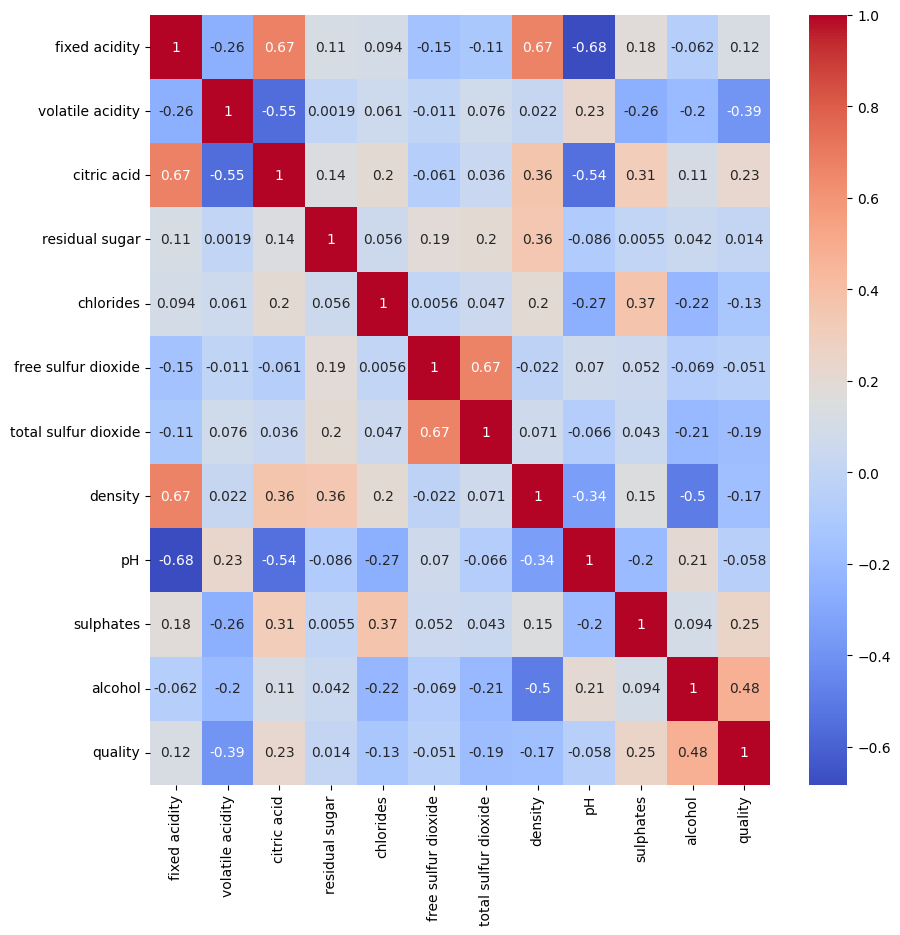

In [22]:
plt.figure(figsize =  (10, 10))
sns.heatmap(corr, cbar=True, annot=True, cmap='coolwarm')

Data Preprocessing

In [34]:
X = wine_data.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
X.shape

(1599, 11)

Label Binarization/Encoding

In [33]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value >= 7  else 0)
Y.head(20)

,quality
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


Training and Testing Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [45]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Training


In [46]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [47]:
predict1 = model.predict(X_test)
print(predict1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


Model Evaluation

In [48]:
accuracy1 = accuracy_score(predict1, Y_test)
accuracy1

0.934375

BUILDING A PREDICTIVE MODEL

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

# changing data to array
input_data_as_array = np.asarray(input_data)

# reshaping data as we are only predicting one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0]==1:
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


[0]
Bad Quality Wine
